In [ ]:
def add(v1, v2):
    """
        Add two 2D vectors represented as tuples.
    """
    return v1[0] + v2[0], v1[1] + v2[1]

In [2]:
def add(*vs):
    """
        Add any number of vectors
    """
    x = vs[0]
    y = vs[1]
    for i in range(1, len(vs)):
        x += vs[i][0]
        y += vs[i][1]

    return x, y
    
def add(*vs):
    return sum([v[0] for v in vs]), sum([v[1] for v in vs])

In [13]:
def get_length(v):
    """
        Get the length of a 2D vector.
    """    
    return (v[0]**2 + v[1]**2) ** 0.5

In [4]:
def scale(v, s):
    """
        Get the scalar product of a 2D vector by s.
    """
    return s * v[0], s * v[1]

In [5]:
def translate(translation, vectors):
    """
        Move a list of vectors to a vector
    """
    return [add(translation, v) for v in vectors]

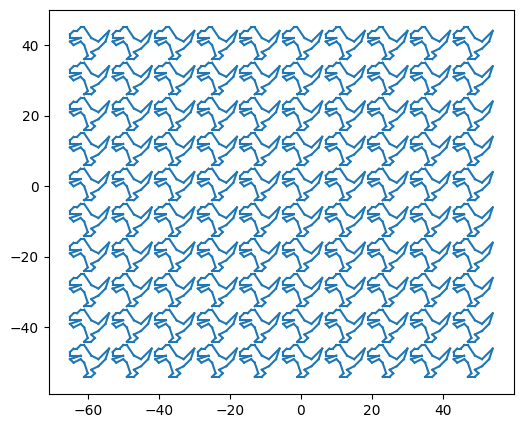

In [25]:
import sys
sys.path.append('../utils')
from draw2D import Polygon2D, draw2D
from colors import *

dino_vectors = [(6, 4), (3, 1), (1,2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),  (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]
def hundred_dinos():
    translations = [(12 * x, 10 * y) for x in range(-5, 5) for y in range(-5, 5)]
    dinos = [Polygon2D(*translate(t, dino_vectors)) for t in translations]
    draw2D(*dinos, grid=None, axes=None, origin=None)

hundred_dinos()

In [23]:
import math
def to_cartesian(polar_vector):
    length, angle = polar_vector 
    return (math.cos(angle) * length, math.sin(angle) * length)



In [8]:
# print(math.degrees(math.asin(math.sin(1))))
# print(math.degrees(math.asin(3/math.sqrt(13))))
def custom_atan2(vector):
    x, y = vector
    if x > 0:
        return math.degrees(math.atan(y/x))
    elif x < 0 and y >= 0:
        return math.degrees(math.atan(y/x) + math.pi)
    elif x < 0 and y < 0:
        return math.degrees(math.atan(y/x) - math.pi)
    elif x == 0 and y > 0:
        return 90.0
    elif x == 0 and y < 0:
        return -90.0
    else:  # (0,0) — угол не определён
        return 0.0


vector = (-2, -3)

length = math.sqrt(vector[0] ** 2 + vector[1] ** 2) # Теорема Пифагора
sin = vector[1]/length
cos = vector[0]/length
tan = vector[1]/vector[0]
# angle - ? 
angle = math.degrees(math.asin(sin))
angle2 = math.degrees(math.acos(cos))
angle3 = math.degrees(math.atan(tan))
angle4 = math.degrees(math.atan2(vector[1], vector[0]))
angle5 = custom_atan2(vector)

print(length, cos, sin, tan)
print(angle, angle2, angle3, angle4, angle5)



3.605551275463989 -0.5547001962252291 -0.8320502943378437 1.5
-56.30993247402022 123.6900675259798 56.309932474020215 -123.69006752597979 -123.69006752597979


In [18]:
def to_polar(vector):
    l = get_length(vector)
    angle = math.atan2(vector[1], vector[0])
    return (l, angle) 

In [32]:
def rotate(vectors, angle):
    polar = [to_polar(vector) for vector in vectors]
    rotated = [(l, angle + rotation_angle) for l, angle in polar]
    cartesian = [to_cartesian(vector) for vector in rotated]
    return cartesian

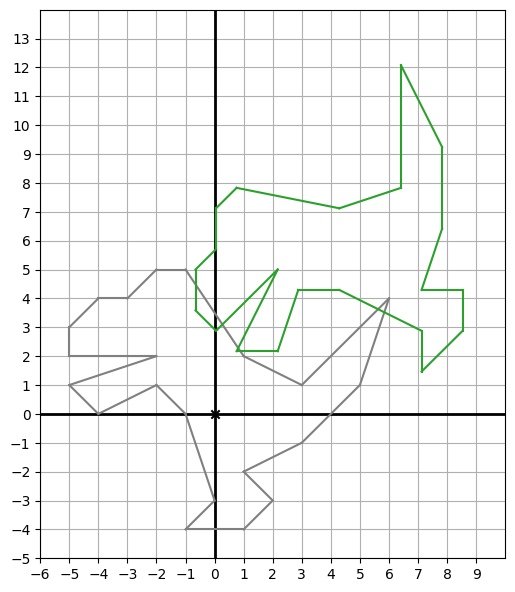

In [34]:
rotation_angle = math.pi / 4
draw2D(Polygon2D(*dino_vectors, color=GRAY), Polygon2D(*translate((5, 5), rotate(dino_vectors, rotation_angle)),  color=GREEN) )


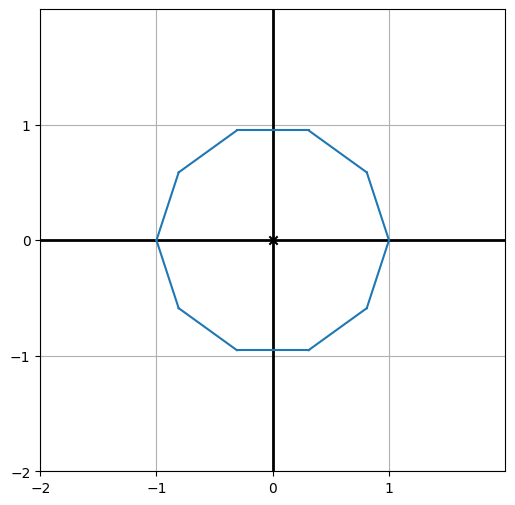

In [36]:
def polygon(n):
    return [to_cartesian((1, 2*math.pi*i/n)) for i in range(n)]



draw2D(Polygon2D(*polygon(10)))